<a href="https://colab.research.google.com/github/HasancanCakicioglu/Kaggle_Competitions/blob/main/HousePrices/HousePrices_AdvancedRegressionTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDOneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import warnings
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDOneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import warnings
from matplotlib import pyplot as plt

In [66]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

def calculate_feature_importance(data, target_column, random_state=42):
    """
    Calculate impurity based feature importance and permutation importance using Random Forest.

    Parameters:
    - data (DataFrame): The input dataset containing both features and target_column.
    - target_column (str): The name of the target column.
    - random_state (int): Random seed for reproducibility. Default is None.

    Returns:
    - impurity_importance_df (DataFrame): Impurity-based feature importances with feature names.
    - permutation_importance_df (DataFrame): Permutation feature importances with feature names.
    """

    # Separate features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and fit the Random Forest model
    rf_model = RandomForestRegressor(random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Calculate impurity-based feature importances
    impurity_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    impurity_importance_df = pd.DataFrame({"Feature": impurity_importance.index, "Impurity Importance": impurity_importance.values})


    # Calculate permutation feature importances
    permutation_result = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=random_state)
    permutation_importance_mean = pd.Series(permutation_result.importances_mean, index=X.columns).sort_values(ascending=False)
    permutation_importance_std = pd.Series(permutation_result.importances_std, index=X.columns).sort_values(ascending=False)
    permutation_importance_df = pd.DataFrame({"Feature": permutation_importance_mean.index, "Permutation Importance Mean": permutation_importance_mean.values, "Permutation Importance Std": permutation_importance_std.values})

    return impurity_importance_df, permutation_importance_df

In [67]:
import pandas as pd


def high_correlation_between_features(data, threshold=0.0, correlation_method='pearson'):
    # pearson for linear
    #spearman for non linear

    # Calculates the correlations between columns in the given DataFrame and prints the results in descending order.

    # param data DataFrame containing the dataset
    # param threshold Threshold for filtering correlations (optional)
    # param correlation_method Method for calculating correlations: 'pearson' or 'spearman'

    # Calculate the correlation matrix using the specified method
    if correlation_method == 'pearson':
        correlation_matrix = data.corr(method='pearson')
    elif correlation_method == 'spearman':
        correlation_matrix = data.corr(method='spearman')
    else:
        raise ValueError("Invalid correlation_method. Use 'pearson' or 'spearman'.")

    # Set upper triangle values to NaN to avoid duplicate correlations
    upper_triangle = correlation_matrix.where(pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Reshape and sort the correlations in descending order
    sorted_correlations = upper_triangle.unstack().sort_values(ascending=False)

    # Filter correlations by the threshold
    if threshold > 0:
        sorted_correlations = sorted_correlations[sorted_correlations > threshold]

    # Print the correlations
    for (column1, column2), correlation in sorted_correlations.items():
        print(f"Correlation between {column1} and {column2}: {correlation:.4f}")

In [68]:
import pandas as pd
import zipfile

def extract_zip_file(zip_path, extract_to):
    """
    Extracts a zip file to the specified directory.

    Args:
        zip_path (str): The path to the zip file.
        extract_to (str): The path to the directory where the contents will be extracted.
    """
    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [69]:
# Define the paths for the zip file and the extraction directory
zip_file_path = '/content/house-prices-advanced-regression-techniques.zip'
extraction_directory = '/content/extracted_data'

# Call the function to extract the zip file
extract_zip_file(zip_file_path, extraction_directory)

In [70]:
# CSV dosyasını DataFrame'e yükle
data = pd.read_csv(extraction_directory+"/sample_submission.csv")

# DataFrame'i incele
data.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [71]:
train = pd.read_csv(extraction_directory+"/train.csv")
test = pd.read_csv(extraction_directory+"/test.csv")

<Axes: xlabel='Id', ylabel='SalePrice'>

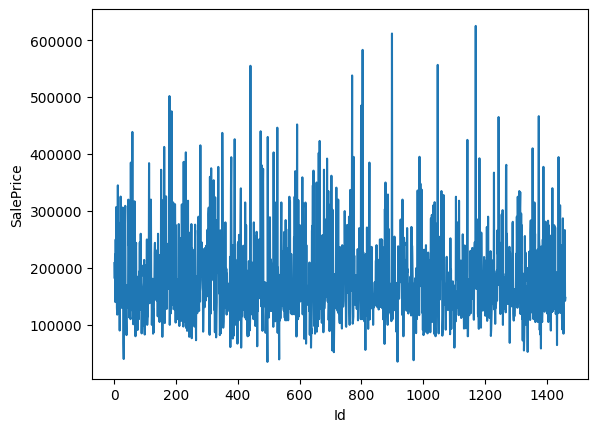

In [9]:
sns.lineplot(data=train[train["SalePrice"]<630000], x='Id',y='SalePrice')

In [ ]:
train = train[train["SalePrice"]<630000]

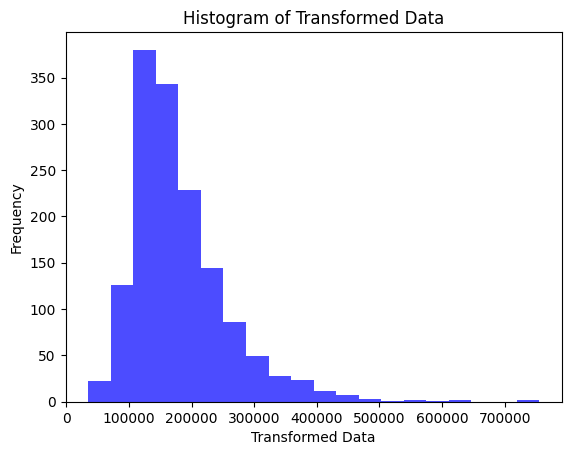

In [10]:
import matplotlib.pyplot as plt
plt.hist(train["SalePrice"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Transformed Data')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Data')
plt.show()

In [11]:
pd.set_option('display.max_rows', None)

In [87]:
selected_columns = impurity_importance_df['Feature'].head(150)

In [ ]:
df_train_df_combined_encoded[selected_columns]

In [ ]:
selected_columns = permutation_importance_df["Feature"].head(140)

In [86]:
impurity_importance_df, permutation_importance_df = calculate_feature_importance(df_train_df_combined_encoded,"SalePrice", random_state=42)

In [ ]:
impurity_importance_df

Feature  Impurity Importance
0              OverallQual         5.529910e-01
1                GrLivArea         1.198871e-01
2                 2ndFlrSF         3.437519e-02
3              TotalBsmtSF         3.343783e-02
4               BsmtFinSF1         2.846825e-02
5                 1stFlrSF         2.579284e-02
6                  LotArea         1.730083e-02
7               GarageArea         1.419386e-02
8                YearBuilt         1.181043e-02
9               GarageCars         1.145202e-02
10                BsmtQual         1.054246e-02
11             LotFrontage         8.657891e-03
12            TotRmsAbvGrd         7.266471e-03
13            YearRemodAdd         6.992142e-03
14             KitchenQual         6.732438e-03
15            GarageFinish         6.529849e-03
16                FullBath         6.223689e-03
17             GarageYrBlt         6.185635e-03
18             OpenPorchSF         5.508322e-03
19             FireplaceQu         5.355989e-03
20               BsmtUnfSF         5.129683e-03
21              WoodDeckSF         4.187141e-03
22             OverallCond         4.102881e-03
23                      Id         3.999371e-03
24              MasVnrArea         3.116547e-03
25             ScreenPorch         3.004421e-03
26                  MoSold         2.901125e-03
27               ExterQual         2.305424e-03
28       GarageType_Detchd         1.603586e-03
29            BedroomAbvGr         1.552923e-03
30              GarageCond         1.494474e-03
31       GarageType_Attchd         1.387489e-03
32         BsmtExposure_Gd         1.344394e-03
33                  YrSold         1.282107e-03
34              Fireplaces         1.281024e-03
35    Neighborhood_Edwards         1.155585e-03
36            LotShape_Reg         1.140000e-03
37         LandContour_Bnk         1.119687e-03
38         BsmtExposure_No         1.044278e-03
39               HeatingQC         1.022294e-03
40                  PoolQC         1.020523e-03
41                PoolArea         9.285879e-04
42             MSZoning_RM         9.143238e-04
43         LandContour_Lvl         8.999299e-04
44       LotConfig_CulDSac         8.156251e-04
45            BsmtFullBath         7.495484e-04
46            SaleType_New         7.483336e-04
47    SaleCondition_Normal         7.259603e-04
48           MSSubClass_60         7.174474e-04
49        MasVnrType_Stone         7.118783e-04
50           RoofStyle_Hip         7.056221e-04
51         BsmtFinType_ALQ         6.964180e-04
52        RoofMatl_CompShg         6.864484e-04
53                HalfBath         6.483570e-04
54   SaleCondition_Partial         6.432523e-04
55        Exterior_MetalSd         6.343108e-04
56           LandSlope_Gtl         6.288458e-04
57              GarageQual         6.274229e-04
58               Alley_nan         6.097971e-04
59    Neighborhood_Crawfor         5.806929e-04
60              BsmtFinSF2         5.649354e-04
61                BsmtCond         5.608751e-04
62        Exterior_VinylSd         5.491383e-04
63        LotConfig_Corner         5.313111e-04
64            KitchenAbvGr         5.164159e-04
65             MSZoning_RL         5.031374e-04
66           EnclosedPorch         4.935515e-04
67         BsmtFinType_GLQ         4.641280e-04
68    Neighborhood_NoRidge         4.128906e-04
69        Exterior_Wd Sdng         4.033583e-04
70   SaleCondition_Abnorml         4.004106e-04
71               Fence_nan         3.924364e-04
72        Exterior_CmentBd         3.918521e-04
73           BldgType_1Fam         3.810945e-04
74               ExterCond         3.757610e-04
75         RoofStyle_Gable         3.650560e-04
76        Exterior_BrkFace         3.588522e-04
77          Functional_Typ         3.584357e-04
78        LotConfig_Inside         3.556019e-04
79        Exterior_HdBoard         3.532628e-04
80      Neighborhood_NAmes         3.515384e-04
81         MasVnrType_None         3.466215e-04
82            LotShape_IR1         

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(impurity_importance_df, *['Impurity Importance'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(impurity_importance_df, *['Impurity Importance'], **{})
chart

In [ ]:
if 'PoolArea' in selected_columns.values:
    print("OverallQual sütunu seçilmiş.")
else:
    print("OverallQual sütunu seçilmemiş.")

OverallQual sütunu seçilmiş.


In [ ]:
type(selected_columns)

pandas.core.series.Series

In [ ]:
high_correlation_between_features(df_train_df_combined_encoded, threshold=0.5, correlation_method='spearman')

Correlation between BldgType_Duplex and MSSubClass_90: 1.0000
Correlation between BsmtFinType2_nan and BsmtFinType_nan: 1.0000
Correlation between PoolQC and PoolArea: 1.0000
Correlation between SaleCondition_Partial and SaleType_New: 0.9868
Correlation between BldgType_2fmCon and MSSubClass_190: 0.9834
Correlation between Exterior_CmentBd and Exterior_CemntBd: 0.9742
Correlation between BsmtExposure_nan and BsmtFinType_nan: 0.9737
Correlation between BsmtFinType2_nan and BsmtExposure_nan: 0.9730
Correlation between MiscFeature_Shed and MiscVal: 0.9463
Correlation between HouseStyle_SLvl and MSSubClass_80: 0.9423
Correlation between HouseStyle_1.5Fin and MSSubClass_50: 0.9409
Correlation between HouseStyle_1.5Unf and MSSubClass_45: 0.9252
Correlation between FireplaceQu and Fireplaces: 0.8951
Correlation between GarageYrBlt and YearBuilt: 0.8644
Correlation between Neighborhood_Somerst and MSZoning_FV: 0.8628
Correlation between GarageArea and GarageCars: 0.8533
Correlation between Roo

<ipython-input-3-1e32905f120b>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper_triangle = correlation_matrix.where(pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))


In [72]:
df_train = train.copy()
df_test = test.copy()

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Verilerinizi yükleyin veya oluşturun
# df_train = ...
# df_test = ...

# Veri kümelerine etiket ekleyin
df_train['is_test'] = 0
df_test['is_test'] = 1

# Veri kümelerini birleştirin
df_combined = pd.concat([df_train, df_test], ignore_index=True)


In [74]:
import pandas as pd
import plotly.express as px

def visualize_summary_statistics(data):
    summary = data.describe().T
    styled_summary = summary.style \
        .bar(subset=['mean'], color=px.colors.qualitative.G10[2]) \
        .background_gradient(subset=['std'], cmap='Blues') \
        .background_gradient(subset=['50%'], cmap='BuGn')

    return styled_summary

# Example usage
summary_visualization = visualize_summary_statistics(df_combined)
summary_visualization

In [ ]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [75]:
def visualize_missing_values(df, color='red'):
    missing_counts = df.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]

    if missing_columns.empty:
        print("No missing values in the DataFrame.")
        return

    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_columns.index, y=missing_columns.values, color=color)
    plt.xticks(rotation=90)
    plt.xlabel('Columns')
    plt.ylabel('Missing Value Counts')
    plt.title('Missing Value Visualization')
    plt.show()

In [ ]:
visualize_missing_values(df_combined_featured.drop(["SalePrice"],axis=1))

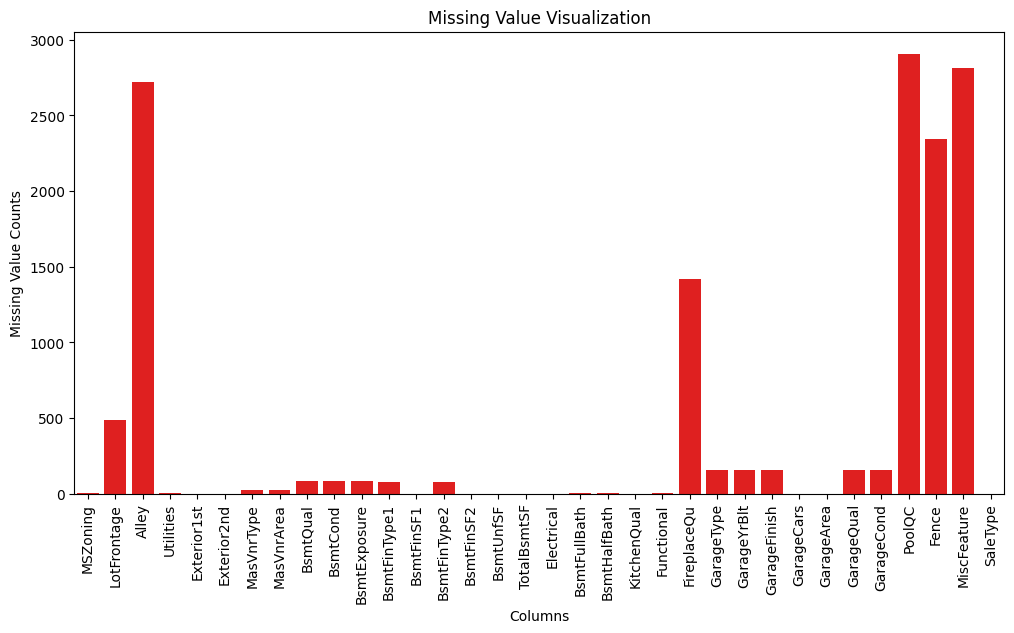

In [ ]:
visualize_missing_values(df_combined.drop(["SalePrice"],axis=1))

In [ ]:
["LotFrontage","LotArea"]

In [76]:
import pandas as pd

def combine_columns_and_plus(df, column_one, column_two, unique_list, name):
    # Yeni veri çerçevesini oluştur
    new_df = pd.DataFrame(columns=unique_list)

    for index in range(len(df)):
        new_row_values = [0] * len(unique_list)
        value_from_column_one = df[column_one][index]
        value_from_column_two = df[column_two][index]

        # İstenilen sütunları işaretleme
        column_index = unique_list.index(value_from_column_one)
        new_row_values[column_index] += 1

        column_index = unique_list.index(value_from_column_two)
        new_row_values[column_index] += 1

        new_df.loc[index] = new_row_values

    new_column_names = [f"{name}_{col}" for col in unique_list]
    new_df.columns = new_column_names

    return new_df



In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
df_combined["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [ ]:
df_combined.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  is_test  
0       WD         Normal   208500.0        0  
1       WD         Normal   181500.0        0  
2       WD         Normal   223500.0        0  
3       WD        Abnorml   140000.0        0  
4       WD         Normal   250000.0        0  

[5 rows x 82 columns]

In [77]:
def label_encode_column(dfm,column_name,dict):
  # Verilen sütunu etiketlere göre değiştirin
    df = dfm.copy()
    if df[column_name].dtype != int:
        df[column_name] = df[column_name].map(dict)

    return df

In [78]:
def all_label_encode(df):
  Exter_encoding_dict = {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
    }

  BsmtQual_BsmtCond_encoding_dict = {
        'Ex': 6,
        'Gd': 5,
        'TA': 4,
        'Fa': 3,
        'Po': 2,
        'nan':1
    }

  BsmtFinType1_2_encoding_dict = {
        'GLQ': 7,
        'ALQ': 6,
        'BLQ': 5,
        'Rec': 4,
        'LwQ': 3,
        'Unf': 2,
        'nan': 1,
    }

  GarageFinish_encoding_dict = {
        'Fin': 3,
        'RFn': 2,
        'Unf': 1,
        'nan': 0,

    }

  pool_encoding_dict = {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'nan': 0,

    }

  fence_encoding_dict = {
        'GdPrv': 4,
        'MnPrv': 3,
        'GdWo': 2,
        'Fa': 1,
        'nan': 0,

    }



  df = label_encode_column(df,"ExterQual",Exter_encoding_dict)
  df = label_encode_column(df,"ExterCond",Exter_encoding_dict)

  df = label_encode_column(df,"BsmtQual",BsmtQual_BsmtCond_encoding_dict)
  df = label_encode_column(df,"BsmtCond",BsmtQual_BsmtCond_encoding_dict)

  df = label_encode_column(df,"HeatingQC",Exter_encoding_dict)

  df = label_encode_column(df,"KitchenQual",Exter_encoding_dict)

  df = label_encode_column(df,"FireplaceQu",BsmtQual_BsmtCond_encoding_dict)

  df = label_encode_column(df,"GarageFinish",GarageFinish_encoding_dict)

  df = label_encode_column(df,"GarageCond",BsmtQual_BsmtCond_encoding_dict)
  df = label_encode_column(df,"GarageQual",BsmtQual_BsmtCond_encoding_dict)

  df = label_encode_column(df,"PoolQC",pool_encoding_dict)



  return df






In [ ]:
df_combined["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [ ]:
df_combined["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [ ]:
CmentBd,Wd Shng,Brk Cmn

In [79]:
def combine(df_combinedd):

  df_combined = df_combinedd.copy()

  print("2")
  result_df = combine_columns_and_plus(df_combined,'Condition1','Condition2',['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'],"Condition")
  df_combined = pd.concat([df_combined, result_df], axis=1)
  df_combined = df_combined.drop(['Condition1', 'Condition2'], axis=1)

  print("1")
  result_df = combine_columns_and_plus(df_combined,'Exterior1st','Exterior2nd',[
    'AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing',"Wd Shng","CmentBd","Brk Cmn"]
                                       ,"Exterior")
  df_combined = pd.concat([df_combined, result_df], axis=1)
  df_combined = df_combined.drop(['Exterior1st', 'Exterior2nd'], axis=1)

  print("3")
  result_df = combine_columns_and_plus(df_combined,'BsmtFinType1','BsmtFinType2',[
    'GLQ','ALQ','BLQ','Rec','LwQ','Unf','nan'],"BsmtFinType")
  df_combined = pd.concat([df_combined, result_df], axis=1)
  df_combined = df_combined.drop(['BsmtFinType1', 'BsmtFinType1'], axis=1)


  return df_combined

In [80]:
def featureTransformation(df):
  df['MSSubClass'] = df['MSSubClass'].apply(str)
  df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
  df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
  df['Alley'] = df['Alley'].apply(str)
  df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

  df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
  df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

  df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
  df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

  df['BsmtCond'] = df['BsmtCond'].apply(str)
  df['BsmtQual'] = df['BsmtQual'].apply(str)
  df['BsmtExposure'] = df['BsmtExposure'].apply(str)
  df['BsmtFinType1'] = df['BsmtFinType1'].apply(str)
  df['BsmtFinType2'] = df['BsmtFinType2'].apply(str)

  df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
  df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
  df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())
  df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())

  df['CentralAir'] = df['CentralAir'].apply(lambda x: 1 if x == 'Yes' else 0)

  df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

  df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].median())
  df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].median())

  df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

  df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

  df['FireplaceQu'] = df['FireplaceQu'].apply(str)
  df['GarageType'] = df['GarageType'].apply(str)


  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0).astype(int)
  df['GarageFinish'] = df['GarageFinish'].apply(str)

  df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
  df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())


  df['GarageQual'] = df['GarageQual'].apply(str)
  df['GarageCond'] = df['GarageCond'].apply(str)

  df['PoolQC'] = df['PoolQC'].apply(str)
  df['Fence'] = df['Fence'].apply(str)
  df['MiscFeature'] = df['MiscFeature'].apply(str)

  df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])


  df = all_label_encode(df)
  df = combine(df)


  return df

In [81]:
def fill_missing_values(df):
    for column in df.columns:
        if column == "SalePrice":
            continue
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
        else:
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)
    return df

In [82]:
df_combined_featured = featureTransformation(df_combined)

2
1
3


In [ ]:
df_combined_featured

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1         60       RL         65.0     8450   Pave   nan      Reg   
1        2         20       RL         80.0     9600   Pave   nan      Reg   
2        3         60       RL         68.0    11250   Pave   nan      IR1   
3        4         70       RL         60.0     9550   Pave   nan      IR1   
4        5         60       RL         84.0    14260   Pave   nan      IR1   
5        6         50       RL         85.0    14115   Pave   nan      IR1   
6        7         20       RL         75.0    10084   Pave   nan      Reg   
7        8         60       RL         68.0    10382   Pave   nan      IR1   
8        9         50       RM         51.0     6120   Pave   nan      Reg   
9       10        190       RL         50.0     7420   Pave   nan      Reg   
10      11         20       RL         70.0    11200   Pave   nan      Reg   
11      12         60       RL         85.0    11924   Pave   nan      IR1   
12      13         20       RL         68.0    12968   Pave   nan      IR2   
13      14         20       RL         91.0    10652   Pave   nan      IR1   
14      15         20       RL         68.0    10920   Pave   nan      IR1   
15      16         45       RM         51.0     6120   Pave   nan      Reg   
16      17         20       RL         68.0    11241   Pave   nan      IR1   
17      18         90       RL         72.0    10791   Pave   nan      Reg   
18      19         20       RL         66.0    13695   Pave   nan      Reg   
19      20         20       RL         70.0     7560   Pave   nan      Reg   
20      21         60       RL        101.0    14215   Pave   nan      IR1   
21      22         45       RM         57.0     7449   Pave  Grvl      Reg   
22      23         20       RL         75.0     9742   Pave   nan      Reg   
23      24        120       RM         44.0     4224   Pave   nan      Reg   
24      25         20       RL         68.0     8246   Pave   nan      IR1   
25      26         20       RL        110.0    14230   Pave   nan      Reg   
26      27         20       RL         60.0     7200   Pave   nan      Reg   
27      28         20       RL         98.0    11478   Pave   nan      Reg   
28      29         20       RL         47.0    16321   Pave   nan      IR1   
29      30         30       RM         60.0     6324   Pave   nan      IR1   
30      31         70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32         20       RL         68.0     8544   Pave   nan      IR1   
32      33         20       RL         85.0    11049   Pave   nan      Reg   
33      34         20       RL         70.0    10552   Pave   nan      IR1   
34      35        120       RL         60.0     7313   Pave   nan      Reg   
35      36         60       RL        108.0    13418   Pave   nan      Reg   
36      37         20       RL        112.0    10859   Pave   nan      Reg   
37      38         20       RL         74.0     8532   Pave   nan      Reg   
38      39         20       RL         68.0     7922   Pave   nan      Reg   
39      40         90       RL         65.0     6040   Pave   nan      Reg   
40      41         20       RL         84.0     8658   Pave   nan      Reg   
41      42         20       RL        115.0    16905   Pave   nan      Reg   
42      43         85       RL         68.0     9180   Pave   nan      IR1   
43      44         20       RL         68.0     9200   Pave   nan      IR1   
44      45         20       RL         70.0     7945   Pave   nan      Reg   
45      46        120       RL         61.0     7658   Pave   nan      Reg   
46      47         50       RL         48.0    12822   Pave   nan      IR1   
47      48         20       FV         84.0    11096   Pave   nan      Reg   
48      49        190       RM         33.0     4456   Pave   nan      Reg   
49      50         20       RL         66.0     7742   Pave   nan      Reg   
50      51         60       RL

In [83]:
df_combined_featured_encoded = pd.get_dummies(df_combined_featured)

In [ ]:
df_combined_featured_encoded

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1         65.0     8450            7            5       2003   
1        2         80.0     9600            6            8       1976   
2        3         68.0    11250            7            5       2001   
3        4         60.0     9550            7            5       1915   
4        5         84.0    14260            8            5       2000   
...    ...          ...      ...          ...          ...        ...   
2914  2915         21.0     1936            4            7       1970   
2915  2916         21.0     1894            4            5       1970   
2916  2917        160.0    20000            5            7       1960   
2917  2918         62.0    10441            5            5       1992   
2918  2919         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLw  \
0             2003       196.0          4          3  ...               0   
1             1976         0.0          3          3  ...               0   
2             2002       162.0          4          3  ...               0   
3             1970         0.0          3          3  ...               0   
4             2000       350.0          4          3  ...               0   
...            ...         ...        ...        ...  ...             ...   
2914          1970         0.0          3          3  ...               0   
2915          1970         0.0          3          3  ...               0   
2916          1996         0.0          3          3  ...               0   
2917          1992         0.0          3          3  ...               0   
2918          1994        94.0          3          3  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
2914             0             0            1                      0   
2915             0             0            1                      1   
2916             0             0            1                      1   
2917             0             0            1                      0   
2918             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
2914                      0                     0                     0   
2915                      0                     0                     0   
2916                      0                     0                     0   
2917                      0                     0                     0   
2918                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
2914                     1                      0  
2915                    

In [85]:
# Etikete göre veri kümelerini ayırın
df_train_df_combined_encoded = df_combined_featured_encoded [df_combined_featured_encoded ['is_test'] == 0].drop(columns=['is_test'])
df_test_df_combined_encoded = df_combined_featured_encoded [df_combined_featured_encoded ['is_test'] == 1].drop(columns=['is_test',"SalePrice"])


In [84]:
df_train_df_combined_encoded.shape,df_test_df_combined_encoded.shape

((1460, 256), (1459, 255))

In [88]:
from sklearn.ensemble import IsolationForest

# Veri setini oluşturun (örnek)

# Isolation Forest modelini oluşturun
clf = IsolationForest(contamination=0.1)  # contamination parametresi aykırı değer yüzdesini belirler

# Modeli eğitin ve aykırı değerleri tahmin edin
outliers = clf.fit_predict(df_train_df_combined_encoded)

# Aykırı değerleri içermeyen yeni bir veri çerçevesi oluşturun
cleaned_df = df_train_df_combined_encoded[outliers == 1]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
X_genel = df_train_df_combined_encoded.drop('SalePrice', axis=1)
y_genel = df_train_df_combined_encoded['SalePrice']

In [ ]:
X_genel = df_train_df_combined_encoded[selected_columns]

In [89]:
X_genel = cleaned_df.drop('SalePrice', axis=1)
y_genel = cleaned_df['SalePrice']

In [90]:
X_genel = cleaned_df[selected_columns]

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Verilerinizi yükleyin veya oluşturun
# df = ...



# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X_genel, y_genel, test_size=0.2, random_state=42)

# XGBoost Regresyon modelini oluşturalım
model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

# Modeli eğitelim
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# y_test ve y_pred'in logaritmasını alın
y_test_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)

# Logaritmik RMSE hesaplayın
log_rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

print("Logaritmik RMSE:", log_rmse)

[18:04:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Logaritmik RMSE: 0.10805906113996536


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Verilerinizi yükleyin veya oluşturun
# df = ...


# XGBoost Regresyon modelini oluşturalım
model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

# Modeli eğitelim
model.fit(X, y)

[18:28:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=3460, n_jobs=None, nthread=-1, num_parallel_tree=None,
             objective='reg:linear', ...)

In [ ]:
# Eksik sütunları bulmak için
missing_columns = set(df_train_df_combined_encoded.columns) - set(df_test_df_combined_encoded.columns)
print("Eksik Sütunlar:", missing_columns)

Eksik Sütunlar: set()


In [ ]:
y_pred_test = model.predict(df_test_df_combined_encoded[selected_columns])

In [ ]:
import pandas as pd

# y_pred_test'i bir DataFrame'e dönüştürme
y_pred_test_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_test})


In [ ]:
y_pred_test_df

In [ ]:
y_pred_test_df.to_csv('y_pred_test_df_outliers_0.1_featured_all_importance150_cleaned.csv', index=False)

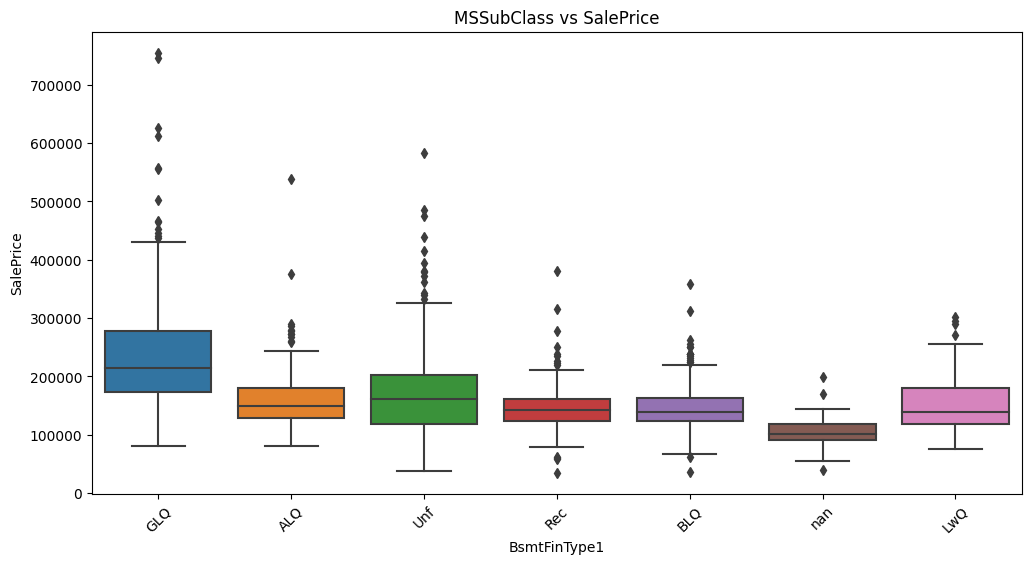

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MSSubClass sütunundaki unique değerlerin SalePrice ile ilişkisini görselleştirin
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x='BsmtFinType1', y='SalePrice')
plt.xticks(rotation=45)
plt.title('MSSubClass vs SalePrice')
plt.show()

In [32]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.2 MB/s eta 0:00:00


In [98]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Verileri yükleyin veya oluşturun
# Örnek veri çerçevesi kullanıyoruz.
x_train, x_test, y_train, y_test = train_test_split(X_genel, y_genel, test_size=0.2, random_state=42)



# Özellikler ve hedef değişkeni ayarlayın
X = x_train  # Özellikler
y = y_train  # Hedef değişken


# K-Fold çapraz doğrulama ayarı
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y),np.log1p(y_pred)))

# Model değerlendirme fonksiyonu
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model,X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

# Modelleri ayarlayın
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))



elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=100000, tol=0.1,alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

svr = make_pipeline(RobustScaler(),
                      SVR(C=20, epsilon=0.008, gamma=0.0003))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=42)

lightgbm = LGBMRegressor(objective='regression',
                                       num_leaves=4,
                                       learning_rate=0.01,
                                       n_estimators=5000,
                                       max_bin=200,
                                       bagging_fraction=0.75,
                                       bagging_freq=5,
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)


# catboost Regressor
catboost = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42)

# Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)


# stack
stack_gen = StackingCVRegressor(regressors=(ridge,  elasticnet,
                                            gbr, xgboost, lightgbm,catboost,random_forest),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)




# Modelleri değerlendirin
print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())


score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())

score = cv_rmse(catboost)
print("Cart Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())

score = cv_rmse(random_forest)
print("Random Forest Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())




# Modelleri eğitin
print('START Fit')
print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print(datetime.now(), 'catboost Tree Regressor')
catboost_model_full_data = catboost.fit(X, y)
print(datetime.now(), 'Random Forest Regressor')
random_forest_model_full_data = random_forest.fit(X, y)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
8:	learn: 46390.5476721	total: 70.8ms	remaining: 7.8s
9:	learn: 44467.8760621	total: 76.7ms	remaining: 7.59s
10:	learn: 42444.6660498	total: 82.4ms	remaining: 7.41s
11:	learn: 40710.0086557	total: 88.1ms	remaining: 7.26s
12:	learn: 39041.6478928	total: 94ms	remaining: 7.14s
13:	learn: 37437.4577088	total: 99.8ms	remaining: 7.03s
14:	learn: 36103.3691436	total: 106ms	remaining: 6.93s
15:	learn: 34824.3641542	total: 112ms	remaining: 6.86s
16:	learn: 33626.8201827	total: 117ms	remaining: 6.79s
17:	learn: 32522.8387768	total: 123ms	remaining: 6.74s
18:	learn: 31449.6106221	total: 129ms	remaining: 6.68s
19:	learn: 30587.3820860	total: 135ms	remaining: 6.63s
20:	learn: 29755.9010626	total: 141ms	remaining: 6.58s
21:	learn: 29001.8059124	total: 147ms	remaining: 6.53s
22:	learn: 28196.4466638	total: 153ms	remaining: 6.49s
23:	learn: 27543.9547900	total: 159ms	remaining: 6.46s
24:	learn: 26836.8005823	total: 165ms	remaining: 6.42s
25:	learn: 26316.

In [99]:
models = [
    elastic_model_full_data,
    ridge_model_full_data,
    svr_model_full_data,
    gbr_model_full_data,
    xgb_model_full_data,
    lgb_model_full_data,
    catboost_model_full_data,
    random_forest_model_full_data,
    stack_gen_model
]

In [36]:
import itertools

def find_best_weighted_combination(models, x_test, y_test):
    best_score = float('inf')  # Başlangıçta en iyi skoru sonsuz olarak ayarla
    best_weights = None  # En iyi ağırlık kombinasyonunu saklamak için bir değişken oluştur

    # Model tahminlerini bir kez yapın ve bir liste içinde saklayın
    model_predictions = [model.predict(x_test) for model in models]

    # Ağırlık kombinasyonlarını deneyin
    for weights in itertools.product(range(11), repeat=len(models)):
        # Ağırlıkları normalize edin (toplam ağırlık 1 olmalı)
        total_weight = sum(weights)
        if total_weight == 10:
            normalized_weights = [w / total_weight for w in weights]

            # Tahminleri ağırlıklandırarak birleştirin
            blended_prediction = sum(w * model for w, model in zip(normalized_weights, model_predictions))

            # Tahminleri kullanarak hata hesaplayın
            score = rmsle(y_test, blended_prediction)

            # En iyi skoru ve ağırlık kombinasyonunu güncelleyin
            if score < best_score:
                print('Best RMSLE Score:', best_score)
                print('Best Weights:', normalized_weights)
                best_score = score
                best_weights = normalized_weights

    # En iyi skoru ve ağırlık kombinasyonunu yazdırın
    print('Best RMSLE Score:', best_score)
    print('Best Weights:', best_weights)

In [101]:
find_best_weighted_combination(models, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Best RMSLE Score: inf
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Best RMSLE Score: 0.10579374167905231
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.9]
Best RMSLE Score: 0.10443884332201331
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8]
Best RMSLE Score: 0.10427036698662745
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.8]
Best RMSLE Score: 0.10334483014252888
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.8]
Best RMSLE Score: 0.1030990635807621
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.7]
Best RMSLE Score: 0.10255490933367861
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.7]
Best RMSLE Score: 0.10221859662324205
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.6]
Best RMSLE Score: 0.1020663661273418
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.6]
Best RMSLE Score: 0.10164655913103167
Best Weights: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5]
Best RMSLE Score: 0.10137876259628191


In [106]:
def blend_models_predict(X):
    return ((0.0 * elastic_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.0 * svr_model_full_data.predict(X)) + \
            (0.3 * gbr_model_full_data.predict(X)) + \
            (0.0 * xgb_model_full_data.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.1 * catboost_model_full_data.predict(X)) + \
            (0.0 * random_forest_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmsle(df_train_df_combined_encoded['SalePrice'], blend_models_predict(df_train_df_combined_encoded[selected_columns])))

RMSLE score on train data:
0.09284542024460578


In [107]:
def blend_models_predict_coefficients(X):
    elastic_pred = 0.0 * elastic_model_full_data.predict(X)
    ridge_pred = 0.1 * ridge_model_full_data.predict(X)
    svr_pred = 0.0 * svr_model_full_data.predict(X)
    gbr_pred = 0.3 * gbr_model_full_data.predict(X)
    xgb_pred = 0.0 * xgb_model_full_data.predict(X)
    lgb_pred = 0.2 * lgb_model_full_data.predict(X)
    catboost_pred = 0.1 * catboost_model_full_data.predict(X)
    random_forest_pred = 0.0 * random_forest_model_full_data.predict(X)
    stack_pred = 0.3 * stack_gen_model.predict(np.array(X))

    # Katsayıları kullanarak tahminleri birleştirin
    final_pred = elastic_pred + ridge_pred + svr_pred + gbr_pred + xgb_pred + lgb_pred + catboost_pred + random_forest_pred + stack_pred

    return final_pred


In [109]:
# Tahminleri yapın
predictions = blend_models_predict_coefficients(df_test_df_combined_encoded[selected_columns])

y_pred_test_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})

y_pred_test_df.to_csv('y_pred_test_df_outliers_0.1_featured_importance150_cleaned_stacking_2.csv', index=False)

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import KFold

# Veriyi yükleyin
(x_train, x_test, y_train, y_test) = train_test_split(X_genel, y_genel, test_size=0.2, random_state=42)





x_train = x_train.values
y_train = y_train.values

# K-Fold Çapraz Doğrulama (5 katlı)
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for train_idx, val_idx in kfolds.split(x_train):
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Modeli oluşturun
    model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)


    # Modeli eğitin
    model.fit(x_train_fold, y_train_fold, verbose=0)

    # Val verileri üzerinde tahminler yapın
    y_val_pred = model.predict(x_val_fold)

    # Val verileri için RMSE hesaplayın ve listeye ekleyin

    rmse_fold = np.sqrt(mean_squared_error(np.log1p(y_val_fold),np.log1p(y_val_pred)))
    print(rmse_fold)
    rmse_scores.append(rmse_fold)

# Sonuçları yazdırın
for i, rmse_score in enumerate(rmse_scores):
    print(f"Fold {i+1} RMSE: {rmse_score:.4f}")

# Ortalama RMSE değerini hesaplayın
mean_rmse = np.mean(rmse_scores)
print("Ortalama RMSE:", mean_rmse)


0.11528262938731075
0.1266912708571881
0.1080655298117043
0.1142907714741042
0.11790532608176048
Fold 1 RMSE: 0.1153
Fold 2 RMSE: 0.1267
Fold 3 RMSE: 0.1081
Fold 4 RMSE: 0.1143
Fold 5 RMSE: 0.1179
Ortalama RMSE: 0.11644710552241358


In [58]:
y_pred_test = model.predict(df_test_df_combined_encoded[selected_columns])

In [59]:
import pandas as pd

# y_pred_test'i bir DataFrame'e dönüştürme
y_pred_test_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_test})

In [61]:
y_pred_test_df.to_csv('y_pred_test_df_outliers_0.1_featured_importance150_cleaned_5fold_xgboost.csv', index=False)